## **ANN**

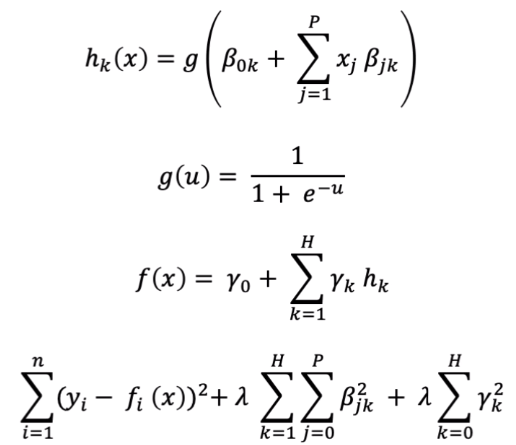

#### **Python Libraries**

In [67]:
import numpy as np
import pandas as pd 
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler 
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#### **Dataset**

In [63]:
hitters = pd.read_csv(r'C:\Users\AleynaCihangir\Desktop\MarketPlace PowerBrands Projects\Hitters.csv')
df = hitters.copy()
df = df.dropna()
df.reset_index(drop=True, inplace=True)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


#### **Model**

In [75]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)
print(colored("\033[1m" + "Model: ", "blue"), mlp_model) 
print(colored("\033[1m" + "How many Layers: ", "blue"), mlp_model.n_layers_)
print(colored("\033[1m" + "Size of Hidden Layer: ", "blue"), mlp_model.hidden_layer_sizes)

Model:  MLPRegressor(hidden_layer_sizes=(100, 20))
How many Layers:  4
Size of Hidden Layer:  (100, 20)


#### **Predict**

In [78]:
y_pred = mlp_model.predict(X_test_scaled)
print(colored("\033[1m" + "RMSN: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSN:  657.9067117965277


#### **Model Tuning**

In [84]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
              'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
              'activation': ['relu','logistic']}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)
mlp_cv_model.fit(X_train_scaled, y_train)
print(colored("\033[1m" + "Best Parameters: ", "blue"), mlp_cv_model.best_params_) 

Best Parameters:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}


In [86]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [ ]:
y_pred = mlp_tuned.predict(X_test_scaled)
print(colored("\033[1m" + "RMSN: ", "blue"), np.sqrt(mean_squared_error(y_test, y_pred))) 